In [533]:
import math
import numpy as np
import pandas as pd
import statistics
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

In [534]:
df = pd.read_csv('C:\\Users\\andre\\OneDrive\\Рабочий стол\\AD\\Научная статья (AD)\\Italian_house_price.csv')


In [535]:
df = df.drop('Type', axis=1)


In [536]:
df.head()

,Price(€),Rooms,mq,Desc,City,Zone,Street
0,142000.0,4,130,"In via Ettore Vitale, strada principale del qu...",Catanzaro,Pontegrande - Sant'Elia,"Via Ettore Vitale, 12"
1,249000.0,4,108,Rif: PRQUAD - La Tempocasa di Cagliari San Ben...,Cagliari,San Benedetto,Via Giovan Battista Pergolesi
2,495000.0,5,117,Living Alberione: Luminoso attico collocato al...,Trento,San Pio X,via alberione
3,89000.0,3,93,"Cornigliano/Coronata parte alta, Via Paradisio...",Genova,Cornigliano,Via Paradiso
4,495000.0,5,89,In Vendita Loft/Mansarda a Venezia Sestiere di...,Venezia,Arsenale - Giardini della Biennale,CASTELLO


In [537]:
filtered_rows = df[df['Rooms'] > 5]
print(filtered_rows)


       Price(€)  Rooms  mq                                               Desc  \
1300   160000.0    140   2  Vendesi a Catanzaro Sala (difronte Farmacia Ci...   
7358    95000.0     95   2  Sul Corso San Giovanni, in Villa d'Epoca propo...   
11343  179000.0    108   1                                        Zona Centro   

            City                     Zone                         Street  
1300   Catanzaro                     Sala             Via della Stazione  
7358      Napoli  San Giovanni a Teduccio  Corso San Giovanni a Teduccio  
11343     Torino         Piazza Solferino                Corso Matteotti  


In [538]:
filtered_rows = df[df['mq'] < 10]
print(filtered_rows)

        Price(€)  Rooms  mq  \
303     140000.0      3   1   
375    5850000.0      5   1   
473     995000.0      5   1   
888    3500000.0      5   2   
904     975000.0      5   1   
1075    514462.5      4   1   
1300    160000.0    140   2   
1329   1290000.0      5   3   
1459   3600000.0      5   2   
1722    170000.0      4   4   
1776    149000.0      5   1   
1814    150000.0      1   7   
3429    770000.0      4   2   
4493   6950000.0      5   1   
4883    908200.0      5   1   
5161    462100.0      4   1   
5303    583770.0      5   1   
5313    428321.0      5   2   
5373    414900.0      3   1   
5583    463016.0      5   1   
7358     95000.0     95   2   
7609    449000.0      3   2   
7987    799000.0      4   3   
8226    998000.0      5   1   
8627   7100000.0      5   1   
8703    190000.0      3   2   
9115   7100000.0      5   1   
9405   1500000.0      5   2   
9877   1400000.0      5   7   
9879   3600000.0      5   1   
11343   179000.0    108   1   
11973  1

In [539]:
# Предположим, что у вас есть DataFrame df и нужно поменять местами значения Rooms и mq
indices_to_swap = [1300, 7358, 11343]  # Индексы строк, где нужно поменять значения

for idx in indices_to_swap:
    temp_rooms = df.loc[idx, 'Rooms']  # Сохраняем значение Rooms временно
    df.loc[idx, 'Rooms'] = df.loc[idx, 'mq']  # Присваиваем значение mq столбцу Rooms
    df.loc[idx, 'mq'] = temp_rooms # Присваиваем сохраненное значение Rooms столбцу mq

In [540]:
filtered_rows = df[df['Rooms'] > 5]
print(filtered_rows)

Empty DataFrame
Columns: [Price(€), Rooms, mq, Desc, City, Zone, Street]
Index: []


In [541]:
top_10_rooms = df.nlargest(10, 'Rooms')
print(top_10_rooms)

     Price(€)  Rooms   mq                                               Desc  \
2    495000.0      5  117  Living Alberione: Luminoso attico collocato al...   
4    495000.0      5   89  In Vendita Loft/Mansarda a Venezia Sestiere di...   
5    797000.0      5  120  Venezia - Al piano primo di una palazzina nel ...   
6    525000.0      5  119  Boccadasse, nel signorile quartiere di Genova,...   
10  1100000.0      5  175  Elegante Piano Nobile di palazzo veneziano sit...   
18   460000.0      5  160  A pochi passi dal Passetto soluzione pronta da...   
21   180000.0      5  118   AMPIO APPARTAMENTO CON 3 CAMERE IN CENTRO MESTRE   
24   530000.0      5  132  VENEZIA, CANNAREGIO GHETTO, secondo piano in d...   
25   950000.0      5  230  La Basilica di San Marco con il suo campanile,...   
27   395000.0      5   97  VENEZIA-LIDO, a pochi minuti da SANTA MARIA EL...   

       City                                Zone                     Street  
2    Trento                           San 

In [542]:
filtered_rows = df[df['mq'] == 1]
print(filtered_rows)

        Price(€)  Rooms  mq  \
303     140000.0      3   1   
375    5850000.0      5   1   
473     995000.0      5   1   
904     975000.0      5   1   
1075    514462.5      4   1   
1776    149000.0      5   1   
4493   6950000.0      5   1   
4883    908200.0      5   1   
5161    462100.0      4   1   
5303    583770.0      5   1   
5373    414900.0      3   1   
5583    463016.0      5   1   
8226    998000.0      5   1   
8627   7100000.0      5   1   
9115   7100000.0      5   1   
9879   3600000.0      5   1   
11973  1850000.0      5   1   
12014  5500000.0      5   1   
13476   595000.0      5   1   
15524   985000.0      5   1   
15592   370000.0      5   1   
15633  1400000.0      5   1   

                                                    Desc     City  \
303    MESTRE MIRANESE - Proponiamo in vendita intere...  Venezia   
375    Straordinaria villa moderna in una delle zone ...  Firenze   
473       Antica villa in vendita a Montevile, Perugia.   Perugia   
904    A M

In [543]:
filtered_rows = df[df['Price(€)'] < 10000]
print(filtered_rows)

       Price(€)  Rooms   mq  \
1325     2000.0      3  140   
2897     7000.0      5  208   
3721     9000.0      3   50   
4018     1000.0      5  218   
10072    1000.0      5  365   
11065       1.0      5  150   

                                                    Desc       City  \
1325   A pochi passi dal mare si propone appartamento...  Catanzaro   
2897                          ASTA GIUDIZIARIA Lotto nr.   Cagliari   
3721   Il residence Rio Falzè è situato in una zona t...     Trento   
4018   VILLAZZANO - In posizione comoda ai principali...     Trento   
10072  Nel suggestivo quartiere Salario Trieste, a po...       Roma   
11065  In piazza Vittorio a Torino, in vendita appart...     Torino   

                    Zone                        Street  
1325      Catanzaro Lido                Traversa Fiume  
2897            Monreale  via Santa Maria Chiara  39 ,  
3721     Laste - Cognola         Via del Pra dei Frati  
4018          Villazzano                  Via Valnigra  

In [544]:
# Удаление строк, где цена ниже 10000
df = df[df['Price(€)'] >= 10000]



In [545]:
filtered_rows = df[df['Price(€)'] < 10000]
print(filtered_rows)

Empty DataFrame
Columns: [Price(€), Rooms, mq, Desc, City, Zone, Street]
Index: []


In [546]:
top_10_mq = df.nlargest(10, 'mq')
print(top_10_mq)

        Price(€)  Rooms   mq  \
4833   3300000.0      5  980   
1191    750000.0      5  950   
9883   1390000.0      5  950   
9155    520000.0      5  933   
6469    880000.0      5  910   
4122   1750000.0      5  900   
10049  1700000.0      5  900   
13715  2400000.0      5  900   
14254  1399000.0      5  900   
15258  1590000.0      5  880   

                                                    Desc     City  \
4833   Splendida villa in vendita, situata su una col...  Firenze   
1191   Privato vende casa indipendente con giardino e...   Trento   
9883   Rif.CBI073-608-129900 - La Coldwell Banker Pre...     Roma   
9155   Bari Torre a Mare - Proponiamo in vendita una ...     Bari   
6469   Trento, località Mattarello in un tranquillo c...   Trento   
4122   Collina est : In lotto di 1500mq , proponiamo ...   Trento   
10049  FUORIGROTTA - E più precisamente nel tratto in...   Napoli   
13715  Via Siepelunga. In posizione eccellente, in tr...  Bologna   
14254  Sulla via Nomentana

In [547]:
top_10_price = df.nlargest(20, 'Price(€)')
print(top_10_price)

        Price(€)  Rooms   mq  \
14485  8200000.0      5  850   
4369   7900000.0      5  601   
12440  7900000.0      5  361   
8627   7100000.0      5    1   
9115   7100000.0      5    1   
14648  7070000.0      5  590   
8761   7000000.0      5  611   
4493   6950000.0      5    1   
10150  6500000.0      5  675   
8868   6490000.0      5  490   
375    5850000.0      5    1   
5714   5500000.0      5  450   
8790   5500000.0      5  415   
12014  5500000.0      5    1   
15503  5500000.0      5    2   
5354   5300000.0      5  450   
11608  5300000.0      5  650   
15779  5200000.0      5  592   
12475  4850000.0      5  600   
7957   4800000.0      5  380   

                                                    Desc     City  \
14485             Palazzetto cielo terra, CENTRO STORICO     Roma   
4369   Firenze centro Vendita 4 piani con ascensore +...  Firenze   
12440  Immersa nel verde e nel silenzio, proponiamo u...   Milano   
8627   Nella zona più esclusiva di San Siro è in ve

In [548]:
filtered_rows = df[df['mq'] < 5]
print(filtered_rows)

        Price(€)  Rooms  mq  \
303     140000.0      3   1   
375    5850000.0      5   1   
473     995000.0      5   1   
888    3500000.0      5   2   
904     975000.0      5   1   
1075    514462.5      4   1   
1329   1290000.0      5   3   
1459   3600000.0      5   2   
1722    170000.0      4   4   
1776    149000.0      5   1   
3429    770000.0      4   2   
4493   6950000.0      5   1   
4883    908200.0      5   1   
5161    462100.0      4   1   
5303    583770.0      5   1   
5313    428321.0      5   2   
5373    414900.0      3   1   
5583    463016.0      5   1   
7609    449000.0      3   2   
7987    799000.0      4   3   
8226    998000.0      5   1   
8627   7100000.0      5   1   
8703    190000.0      3   2   
9115   7100000.0      5   1   
9405   1500000.0      5   2   
9879   3600000.0      5   1   
11973  1850000.0      5   1   
12014  5500000.0      5   1   
13476   595000.0      5   1   
15503  5500000.0      5   2   
15524   985000.0      5   1   
15592   

In [549]:
filtered_rows = df[df['mq'] < 20]
print(filtered_rows)

        Price(€)  Rooms  mq  \
281     120000.0      1  16   
303     140000.0      3   1   
375    5850000.0      5   1   
473     995000.0      5   1   
888    3500000.0      5   2   
904     975000.0      5   1   
1075    514462.5      4   1   
1329   1290000.0      5   3   
1459   3600000.0      5   2   
1526     78000.0      1  18   
1722    170000.0      4   4   
1776    149000.0      5   1   
1814    150000.0      1   7   
1971     49000.0      1  18   
2600     14000.0      1  18   
3122    120000.0      1  17   
3429    770000.0      4   2   
3458     24000.0      1  18   
4493   6950000.0      5   1   
4883    908200.0      5   1   
5161    462100.0      4   1   
5303    583770.0      5   1   
5313    428321.0      5   2   
5373    414900.0      3   1   
5583    463016.0      5   1   
7609    449000.0      3   2   
7987    799000.0      4   3   
8226    998000.0      5   1   
8627   7100000.0      5   1   
8703    190000.0      3   2   
8934     22000.0      1  15   
9115   7

In [550]:
filtered_rows = df[df['Rooms'] == 0]
print(filtered_rows)

      Price(€)  Rooms   mq                                               Desc  \
4719  335000.0      0  129  Vendita diretta dal costruttore di ville singo...   

         City      Zone       Street  
4719  Venezia  Campalto  Via Orlanda  


In [551]:
df = df.query("Rooms != 0")


In [552]:
# Вывод статистических данных с округлением до десятых
print(df.describe().round(1))

        Price(€)    Rooms       mq
count    15991.0  15991.0  15991.0
mean    356555.4      3.6    121.2
std     442533.4      1.1     81.1
min      12000.0      1.0      1.0
25%     135000.0      3.0     75.0
50%     240000.0      4.0    101.0
75%     410000.0      5.0    140.0
max    8200000.0      5.0    980.0


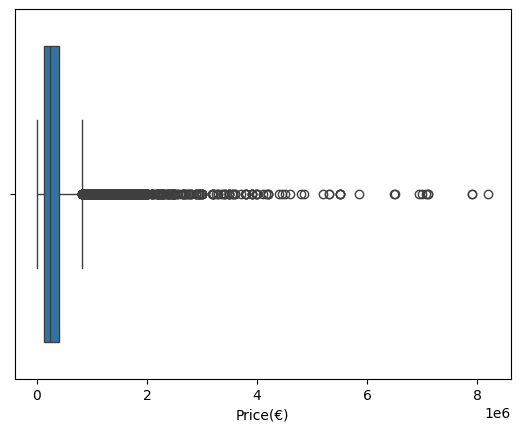

In [553]:
sns.boxplot(x=df['Price(€)'])
plt.show()

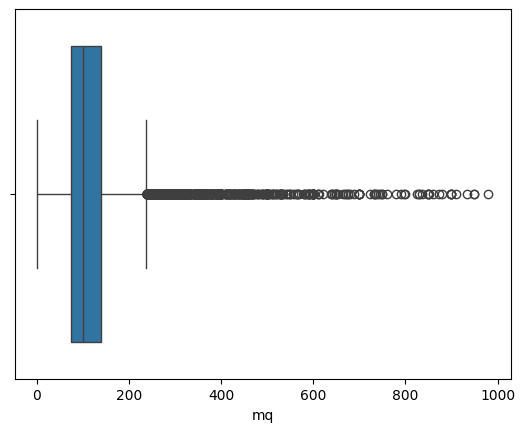

In [554]:
sns.boxplot(x=df['mq'])
plt.show()

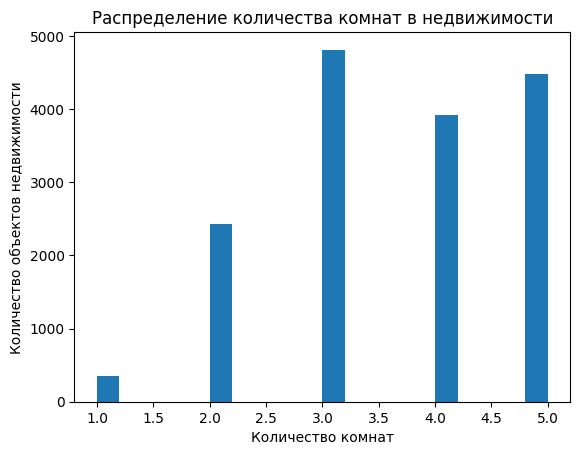

In [555]:
plt.hist(df['Rooms'], bins=20)
plt.title('Распределение количества комнат в недвижимости')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объектов недвижимости')
plt.show()


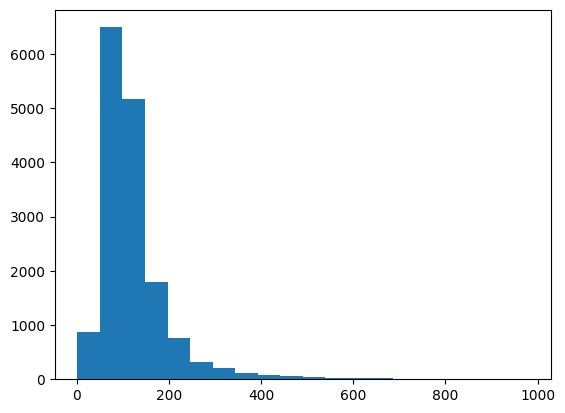

In [556]:
plt.hist(df['mq'], bins=20)
plt.show()

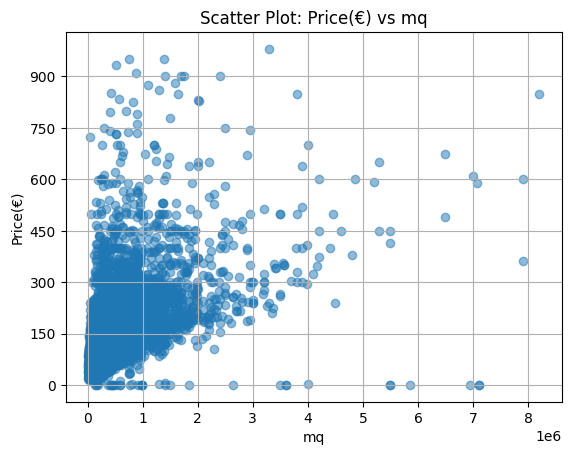

In [557]:
import matplotlib.pyplot as plt

plt.scatter(df['Price(€)'], df['mq'], alpha=0.5)  # Используем alpha для прозрачности точек
plt.xlabel('mq')
plt.ylabel('Price(€)')
plt.title('Scatter Plot: Price(€) vs mq')
plt.grid(True)

# Установка целых чисел на осях
plt.gca().get_xaxis().set_major_locator(plt.MaxNLocator(integer=True))
plt.gca().get_yaxis().set_major_locator(plt.MaxNLocator(integer=True))

plt.show()

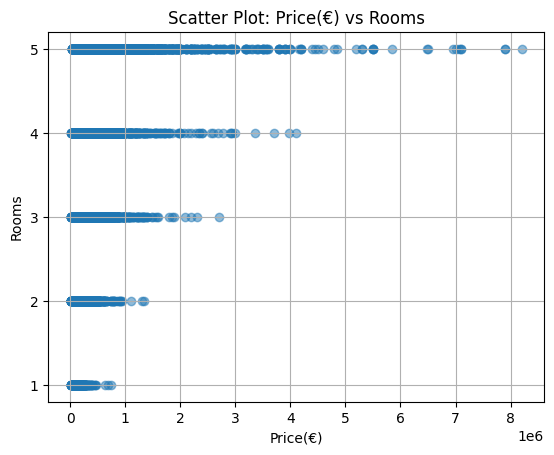

In [558]:
import matplotlib.pyplot as plt

plt.scatter(df['Price(€)'], df['Rooms'], alpha=0.5)  # Используем alpha для прозрачности точек
plt.xlabel('Price(€)')
plt.ylabel('Rooms')
plt.title('Scatter Plot: Price(€) vs Rooms')
plt.grid(True)

# Установка целых чисел на осях
plt.gca().get_xaxis().set_major_locator(plt.MaxNLocator(integer=True))
plt.gca().get_yaxis().set_major_locator(plt.MaxNLocator(integer=True))

plt.show()

In [559]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 15991 entries, 0 to 15997
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price(€)  15991 non-null  float64
 1   Rooms     15991 non-null  int64  
 2   mq        15991 non-null  int64  
 3   Desc      15986 non-null  object 
 4   City      15991 non-null  object 
 5   Zone      15991 non-null  object 
 6   Street    15991 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 999.4+ KB
None


In [560]:
print(df.describe().round(1))


        Price(€)    Rooms       mq
count    15991.0  15991.0  15991.0
mean    356555.4      3.6    121.2
std     442533.4      1.1     81.1
min      12000.0      1.0      1.0
25%     135000.0      3.0     75.0
50%     240000.0      4.0    101.0
75%     410000.0      5.0    140.0
max    8200000.0      5.0    980.0


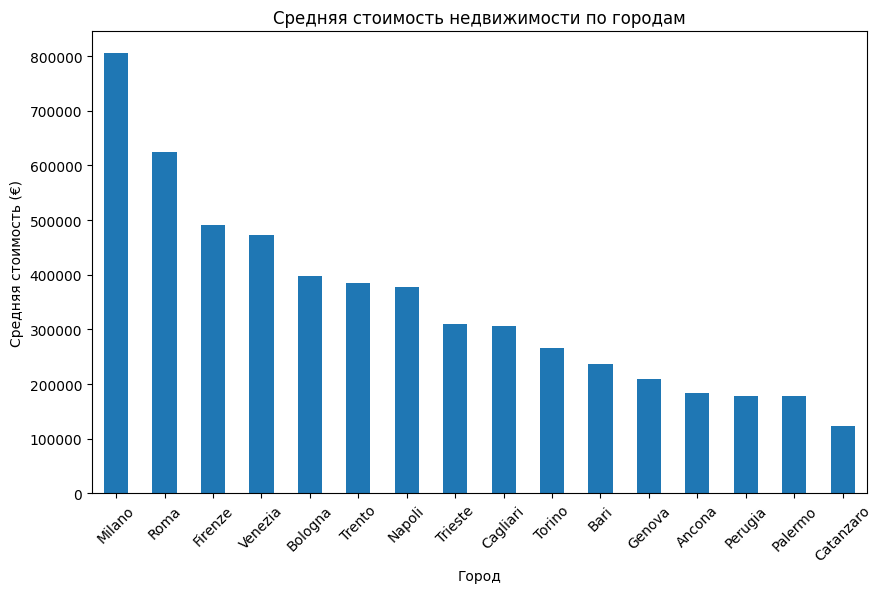

In [561]:
# Расчет средней цены для каждого города
average_prices = df.groupby('City')['Price(€)'].mean().sort_values(ascending=False)

# Построение графика
plt.figure(figsize=(10, 6))
average_prices.plot(kind='bar')
plt.title('Средняя стоимость недвижимости по городам')
plt.xlabel('Город')
plt.ylabel('Средняя стоимость (€)')
plt.xticks(rotation=45)
plt.show()

In [562]:
print(df.describe().round(1))


        Price(€)    Rooms       mq
count    15991.0  15991.0  15991.0
mean    356555.4      3.6    121.2
std     442533.4      1.1     81.1
min      12000.0      1.0      1.0
25%     135000.0      3.0     75.0
50%     240000.0      4.0    101.0
75%     410000.0      5.0    140.0
max    8200000.0      5.0    980.0


C:\Users\andre\AppData\Local\Temp\ipykernel_7000\3037428817.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


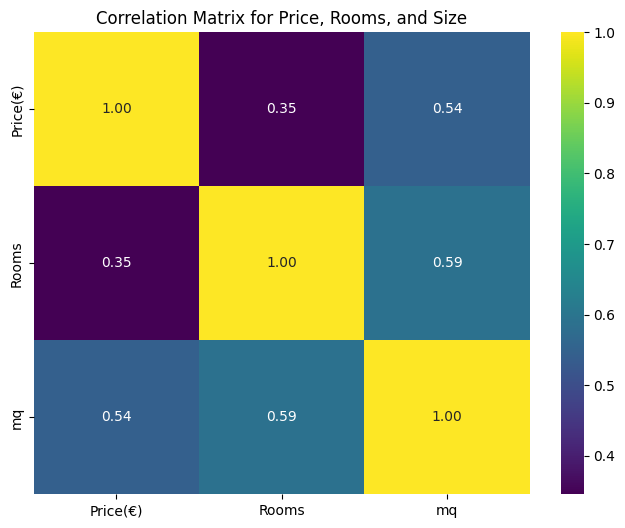

In [563]:
# Оставляем только интересующие нас колонки
df1 = df[['Price(€)', 'Rooms', 'mq']]

# Проверяем на наличие пропущенных значений
df1.dropna(inplace=True)

# Вычисляем матрицу корреляций
correlation_matrix = df1.corr()

# Визуализируем матрицу корреляций
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis')
plt.title('Correlation Matrix for Price, Rooms, and Size')
plt.show()


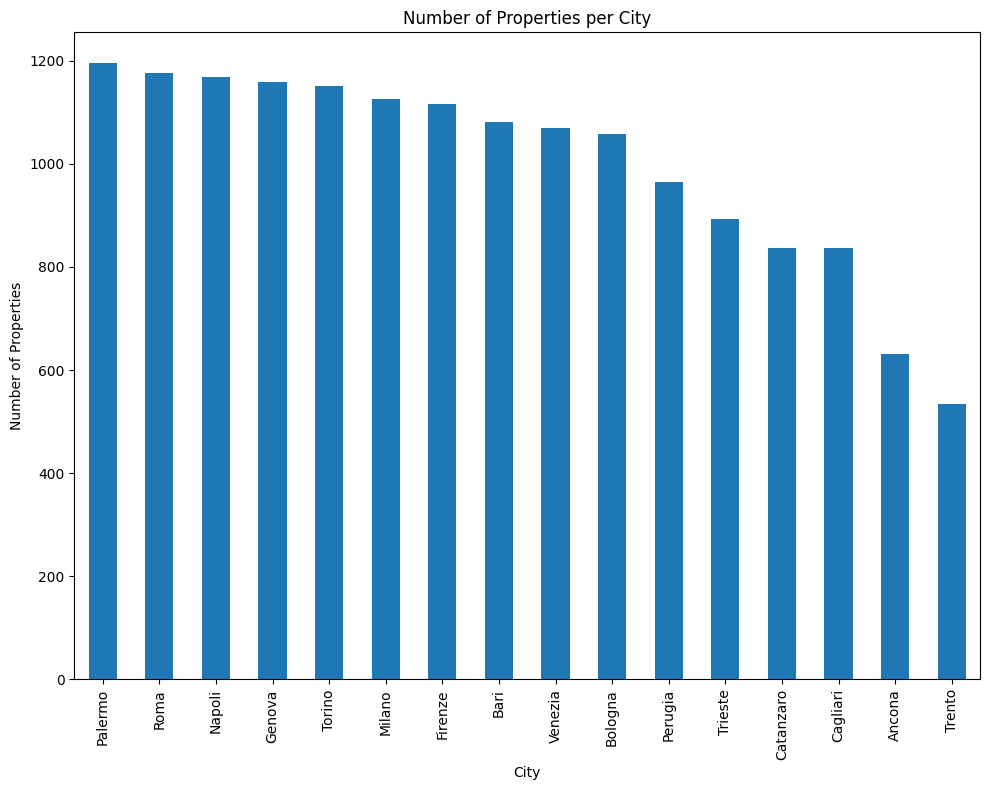

In [564]:
# Подсчет количества недвижимости в каждом городе
property_counts = df['City'].value_counts()

# Визуализация количества недвижимости в каждом городе
plt.figure(figsize=(10, 8))
property_counts.plot(kind='bar')
plt.title('Number of Properties per City')
plt.xlabel('City')
plt.ylabel('Number of Properties')
plt.xticks(rotation=90)  # Поворачиваем названия городов на оси X для лучшей читаемости
plt.tight_layout()  # Автоматически подгоняем элементы графика для лучшего отображения
plt.show()


In [565]:
import pandas as pd
import folium
from branca.colormap import linear

# Загрузка обновленного датасета
df1 = pd.read_csv('C:\\Users\\andre\\OneDrive\\Рабочий стол\\AD\\Научная статья (AD)\\Corrected_Italian_house_price_v2.csv')

# Расчет средней цены для каждого города
avg_prices = df1.groupby('City')['Price(€)'].mean().reset_index()

# Создание карты
italy_map = folium.Map(location=[41.8719, 12.5674], zoom_start=6)  # Центр Италии

# Создание цветовой шкалы
colormap = linear.YlOrRd_09.scale(avg_prices['Price(€)'].min(), avg_prices['Price(€)'].max())

# Добавление кругов на карту
for index, row in avg_prices.iterrows():
    city = row['City']
    avg_price = row['Price(€)']
    
    # Получение данных о Viewport для города
    city_data = df1[df1['City'] == city].iloc[0] if not df1[df1['City'] == city].empty else None
    if city_data is not None:
        viewport_data = city_data['Viewport']
        viewport_parts = viewport_data.split(' - ')
        lat1, lon1 = [float(coord) for coord in viewport_parts[0].split(',')]
        lat2, lon2 = [float(coord) for coord in viewport_parts[1].split(',')]
        center_lat = (lat1 + lat2) / 2
        center_lon = (lon1 + lon2) / 2

        # Создание круга с динамическим радиусом и цветом в зависимости от цены
        folium.Circle(
            location=[center_lat, center_lon],
            radius=10000,  # Радиус можно изменить в зависимости от ваших предпочтений
            color=colormap(avg_price),
            fill=True,
            fill_color=colormap(avg_price),
            fill_opacity=0.7,
            tooltip=f"{city}: {avg_price:.2f} €"  # Tooltip с названием города и средней ценой
        ).add_to(italy_map)

# Добавление цветовой шкалы на карту
colormap.add_to(italy_map)

# Сохранение и отображение карты
italy_map.save('C:\\Users\\andre\\OneDrive\\Рабочий стол\\AD\\Научная статья (AD)\\italian_real_estate_prices_v3.html')


In [566]:
print(df1.columns)


Index(['Price(€)', 'Rooms', 'mq', 'Type', 'Desc', 'City', 'Zone', 'Street',
       'Bounds', 'Viewport'],
      dtype='object')


In [567]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Замените 'path_to_file.csv' на путь к вашему файлу CSV
df = pd.read_csv('C:\\Users\\andre\\OneDrive\\Рабочий стол\\AD\\Научная статья (AD)\\Italian_house_price.csv')

# Переименовываем столбец 'Price(€)' для устранения символа евро
df.rename(columns={'Price(€)': 'Price'}, inplace=True)

# Проведение ANOVA
# Однофакторный ANOVA тест, чтобы увидеть, есть ли значимые различия в ценах на недвижимость между городами
anova_results = ols('Price ~ C(City)', data=df).fit()
anova_table = sm.stats.anova_lm(anova_results, typ=2)

# Вывод таблицы ANOVA
print(anova_table)


                sum_sq       df           F  PR(>F)
C(City)   5.354186e+14     15.0  219.686812     0.0
Residual  2.596745e+15  15982.0         NaN     NaN


In [568]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Загрузка датасета
df = pd.read_csv('C:\\Users\\andre\\OneDrive\\Рабочий стол\\AD\\Научная статья (AD)\\Italian_house_price.csv')

# Предположим, что столбцы 'Price', 'Area', 'Rooms' используются для кластеризации
features = df[['Price(€)', 'mq', 'Rooms']]


In [569]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

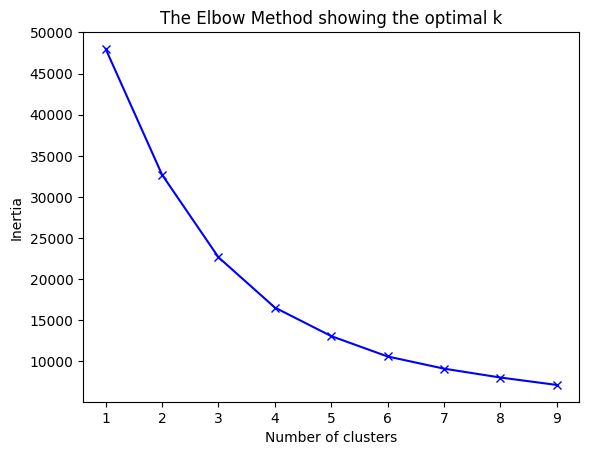

In [570]:
inertia = []
range_values = range(1, 10)

for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range_values, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [571]:
k_optimal = 4 # число кластеров выбранное из графика
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(features_scaled)
df['Cluster'] = clusters


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [572]:
# Группировка по кластерам и расчет средних значений только для числовых столбцов
print(df.groupby('Cluster').mean(numeric_only=True))


             Price(€)       Rooms          mq      Type
Cluster                                                
0        1.991232e+05    2.961718   81.924553  1.248071
1        1.809753e+06    4.885714  372.542857  2.811111
2        4.713594e+05    4.621896  162.609570  2.041871
3        1.446667e+05  114.333333    1.666667  1.666667


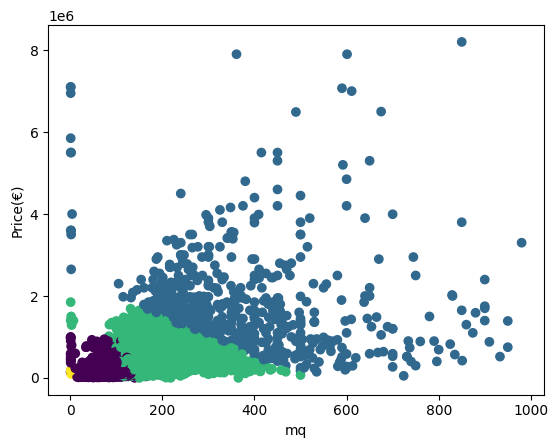

In [573]:
plt.scatter(df['mq'], df['Price(€)'], c=df['Cluster'])
plt.xlabel('mq')
plt.ylabel('Price(€)')
plt.show()


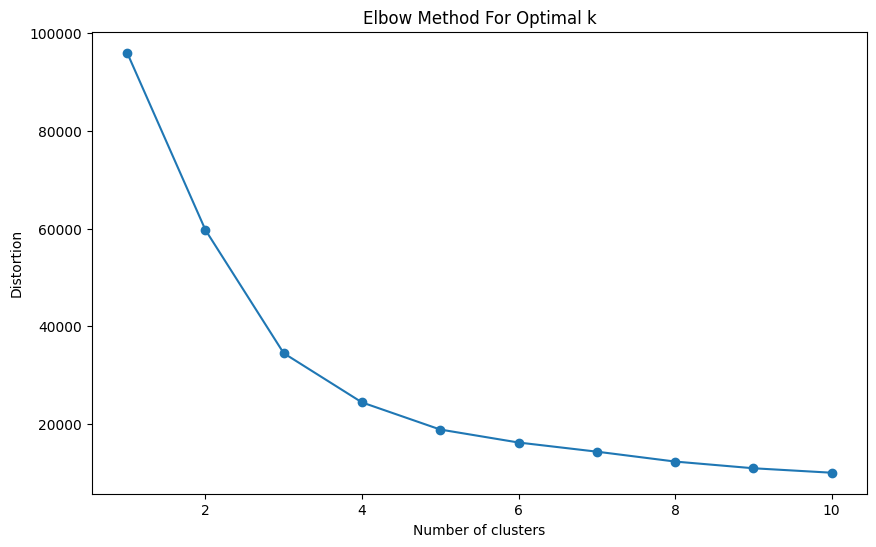

   Price(€)  Rooms   mq  Type  \
0  142000.0      4  130     1   
1  249000.0      4  108     1   
2  495000.0      5  117     2   
3   89000.0      3   93     1   
4  495000.0      5   89     2   

                                                Desc       City  \
0  In via Ettore Vitale, strada principale del qu...  Catanzaro   
1  Rif: PRQUAD - La Tempocasa di Cagliari San Ben...   Cagliari   
2  Living Alberione: Luminoso attico collocato al...     Trento   
3  Cornigliano/Coronata parte alta, Via Paradisio...     Genova   
4  In Vendita Loft/Mansarda a Venezia Sestiere di...    Venezia   

                                 Zone                         Street  Cluster  
0             Pontegrande - Sant'Elia          Via Ettore Vitale, 12        2  
1                       San Benedetto  Via Giovan Battista Pergolesi        2  
2                           San Pio X                  via alberione        0  
3                         Cornigliano                   Via Paradiso        2 

In [574]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Загрузите свой набор данных
data = pd.read_csv('Italian_house_price.csv')

# Выберите числовые признаки для кластеризации
features = data[['Price(€)', 'Rooms', 'mq']]

# Если 'Type' является категориальным, преобразуйте его в числовой формат
# Например, с помощью one-hot encoding
type_dummies = pd.get_dummies(data['Type'], prefix='Type')
features = pd.concat([features, type_dummies], axis=1)

# Создайте пайплайн для предобработки данных: заполнение пропусков и стандартизация
pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())

# Примените пайплайн к выбранным признакам
processed_features = pipeline.fit_transform(features)

# Используйте метод локтя для определения оптимального количества кластеров
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=42)
    km.fit(processed_features)
    distortions.append(km.inertia_)

# Постройте график метода локтя
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# Выберите количество кластеров k на основе графика и создайте модель KMeans с этим k
k = 3 # Пример, выберите подходящее значение k на основе графика
km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
data['Cluster'] = km.fit_predict(processed_features)

# Теперь в data['Cluster'] содержатся метки кластеров для каждой записи
print(data.head())

In [575]:
# Агрегируем данные по городам
city_grouped = data.groupby('City').agg({
    'Price(€)': 'mean',
    'Rooms': 'mean',
    'mq': 'mean',
    # Добавьте другие признаки, которые вы хотите учесть
}).reset_index()

# Подготовка данных для кластеризации
scaler = StandardScaler()
city_features = scaler.fit_transform(city_grouped.iloc[:, 1:])  # Исключаем столбец City

# Применение K-средних для кластеризации городов
kmeans = KMeans(n_clusters=4, random_state=42)  # Используйте оптимальное k, найденное методом локтя
city_grouped['Cluster'] = kmeans.fit_predict(city_features)

# Вывод результатов
print(city_grouped.sort_values('Cluster'))

         City       Price(€)     Rooms          mq  Cluster
0      Ancona  184052.031646  3.696203  113.876582        0
5     Firenze  491610.762332  3.890583  113.205381        0
6      Genova  209757.308290  3.865285  103.813472        0
3    Cagliari  305991.156511  3.697730  125.994026        1
4   Catanzaro  123444.590334  3.787589  127.276850        1
10    Perugia  177727.838093  3.842487  143.224870        1
11       Roma  623814.030612  3.602041  139.827381        1
13     Trento  383961.636872  3.720670  136.093110        1
15    Venezia  472237.555607  3.950467  130.114953        1
7      Milano  804993.735346  3.143872  117.642984        2
1        Bari  236491.661111  3.460185  120.218519        3
2     Bologna  397618.524575  3.473535  111.772212        3
8      Napoli  377896.095462  3.588185  114.346747        3
9     Palermo  177391.983264  3.663598  118.329707        3
12     Torino  265936.981755  3.542137  113.105126        3
14    Trieste  310020.162556  3.252242  

c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [576]:
# Создадим DataFrame на основе данных с картинки 
 
data_from_image = pd.DataFrame({ 
    'City': ['Ancona', 'Firenze', 'Genova', 'Cagliari', 'Catanzaro', 'Perugia', 'Roma', 'Trento',  
             'Venezia', 'Milano', 'Bari', 'Bologna', 'Napoli', 'Palermo', 'Torino', 'Trieste'], 
    'Price(€)': [184052.63, 491610.76, 209757.30, 305991.16, 123444.59, 177727.83, 623814.04,  
                 383961.64, 472237.56, 804993.75, 236491.66, 397618.52, 377896.10, 177391.98,  
                 265396.99, 310020.16], 
    'Rooms': [3.69, 3.90, 3.86, 3.70, 3.79, 3.84, 3.60, 3.72, 3.95, 3.14, 3.46, 4.75, 3.59,  
              3.66, 3.53, 3.25], 
    'mq': [113.88, 113.21, 103.81, 125.99, 127.28, 123.24, 139.83, 136.09, 130.11, 117.64,  
           120.22, 111.77, 114.35, 118.13, 133.31, 120.44], 
    'Cluster': [0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 3, 3, 3, 3, 3, 3] 
}) 
 
# Выведем созданный DataFrame 
data_from_image

,City,Price(€),Rooms,mq,Cluster
0,Ancona,184052.63,3.69,113.88,0
1,Firenze,491610.76,3.90,113.21,0
2,Genova,209757.30,3.86,103.81,0
3,Cagliari,305991.16,3.70,125.99,1
4,Catanzaro,123444.59,3.79,127.28,1
5,Perugia,177727.83,3.84,123.24,1
6,Roma,623814.04,3.60,139.83,1
7,Trento,383961.64,3.72,136.09,1
8,Venezia,472237.56,3.95,130.11,1
9,Milano,804993.75,3.14,117.64,2
